# Example of TS05 W coefficients

This notebook uses omniweb data to get the solar wind indexes. SymH is used to identify the storms. 

In [1]:
import numpy as np
import datetime as dt

from rbamlib.web import omni
from rbamlib.utils import storm_idx, fixfill
from rbamlib.models.mag import TS2005_S, TS2005_W
import matplotlib.pyplot as plt

In [2]:
# 1) Define a date range:
start_date = dt.datetime(2013, 10, 8)
end_date   = dt.datetime(2013, 10, 11)  # 24 hrs later

In [3]:
# 2) Retrieve SymH and other parameters via OMNI data loader:
time, SymH, By, Bz, Pdyn, Nsw, Vsw = omni(start_date, end_date, ['Symh', 'By_GSE', 'Bz_GSE', 'Flow_P', 'N_p', 'Flow_Speed'], resolution='5min')

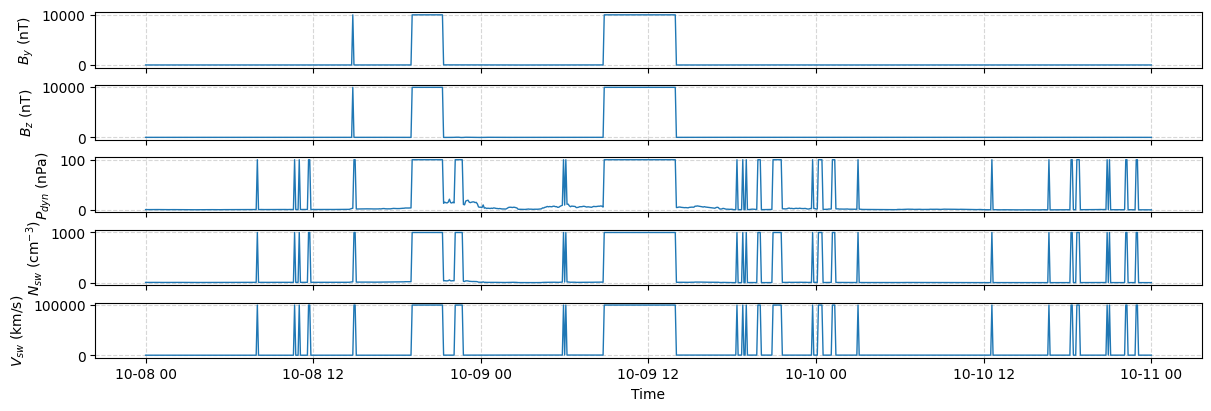

In [4]:
# Parameter list and labels
params = [By, Bz, Pdyn, Nsw, Vsw]
titles = [r'$B_y$ (nT)', r'$B_z$ (nT)', r'$P_{dyn}$ (nPa)', r'$N_{sw}$ (cm$^{-3}$)', r'$V_{sw}$ (km/s)']

# Create figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 4), sharex=True, constrained_layout=True)

# Plot each parameter
for ax, param, title in zip(axs, params, titles):
    ax.plot(time, param, lw=1)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Only the last subplot gets an x-axis label
axs[-1].set_xlabel("Time", fontsize=10)

plt.show()

In [5]:
# 3) Fixing the indexes
By = fixfill(time, By, fillval = 9999.99, method='interp')
Bz = fixfill(time, Bz, fillval = 9999.99, method='interp')
Pdyn = fixfill(time, Pdyn, fillval = 99.99, method='interp')
Nsw = fixfill(time, Nsw, fillval = 999.99, method='interp')
Vsw = fixfill(time, Vsw, fillval = 99999.9, method='interp')

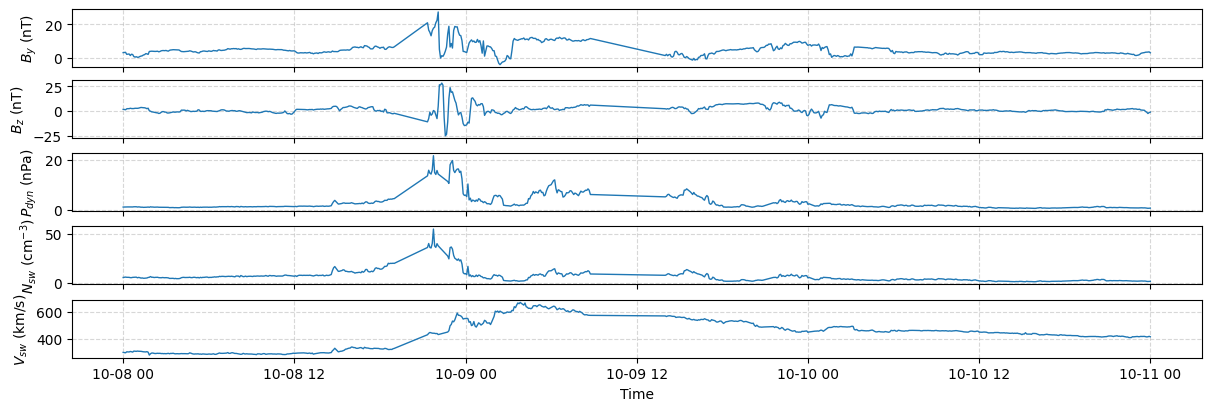

In [6]:
params = [By, Bz, Pdyn, Nsw, Vsw]

# Create figure and subplots
fig, axs = plt.subplots(5, 1, figsize=(12, 4), sharex=True, constrained_layout=True)

# Plot each parameter
for ax, param, title in zip(axs, params, titles):
    ax.plot(time, param, lw=1)
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

# Only the last subplot gets an x-axis label
axs[-1].set_xlabel("Time", fontsize=10)
plt.show()

In [7]:
# 4) Identify storms (indices where SymH < -40)
storms = storm_idx(time, SymH, threshold=-40.0, gap_hours=6.0)
print(f"{len(storms)} Storm onsets indexes:", storms) 

2 Storm onsets indexes: [263 545]


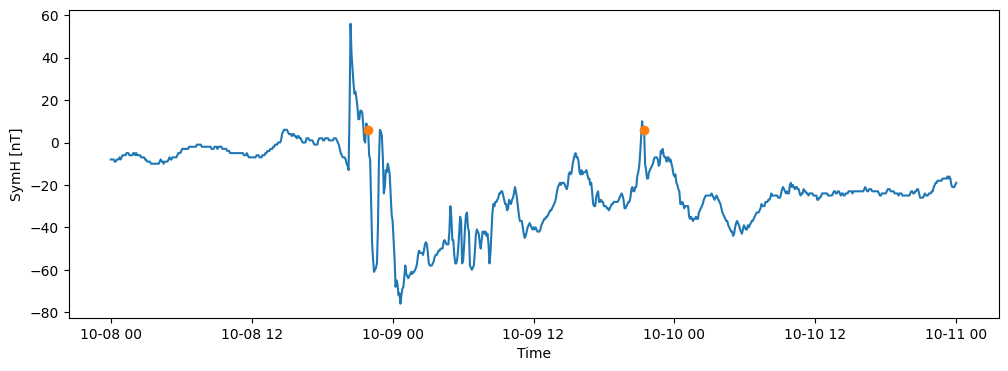

In [8]:
# Plot the storms
fig, ax = plt.subplots(figsize=(12, 4))  # single Axes on a Figure
ax.plot(time, SymH, label="SymH")
ax.plot(time[storms], SymH[storms], label="Storm onsets", marker="o", linestyle="None")
ax.set(title="", xlabel="Time",ylabel="SymH [nT]")
plt.show()

In [9]:
# 5) Compute source functions S => shape (N, 6)
S = TS2005_S(Nsw, Vsw, Bz, fillval=0.)

# 6) Compute W, resetting at each storm
W = TS2005_W(time, S, storm_onsets=np.insert(storms, 0, 0), fill_value=0.)
# W = TS2005_W(time, S)
print("W shape:", W.shape) 

# Check some values
for i in range(6):
    print(f"W{i}, range: {np.nanmin(W[:,i]):.3f} to {np.nanmax(W[:,i]):.3f}, mean: {np.nanmean(W[:,i]):.3f}")

W shape: (865, 6)
W0, range: 0.000 to 1.774, mean: 0.163
W1, range: 0.000 to 2.637, mean: 0.193
W2, range: 0.000 to 0.313, mean: 0.093
W3, range: 0.000 to 2.945, mean: 0.212
W4, range: 0.000 to 3.116, mean: 0.222
W5, range: 0.000 to 13.862, mean: 0.662


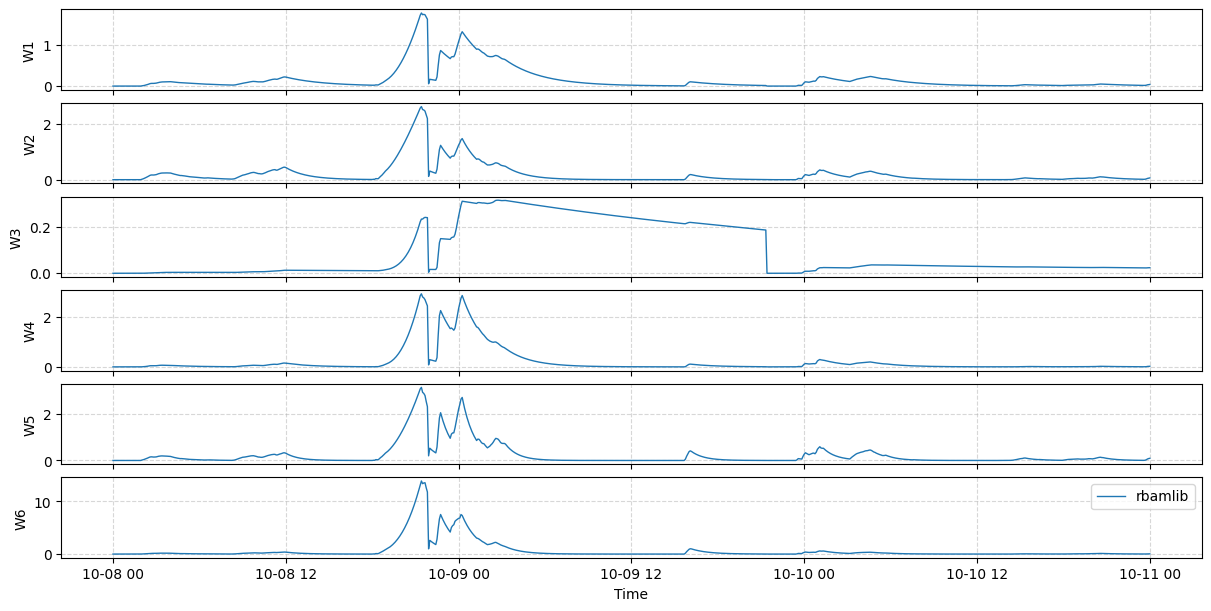

In [10]:
# Create figure and subplots
fig, axs = plt.subplots(6, 1, figsize=(12, 6), sharex=True, constrained_layout=True)
titles=['W1', 'W2', 'W3', 'W4', 'W5', 'W6']
# Plot each parameter
for i, (ax, title) in enumerate(zip(axs, titles)):
    ax.plot(time, W[:,i], lw=1, label='rbamlib')
    ax.set_ylabel(title, fontsize=10)
    ax.grid(True, linestyle="--", alpha=0.5)

ax.legend()
# Only the last subplot gets an x-axis label
ax.set_xlabel("Time", fontsize=10)

plt.show()